# Washburn Equation

In [1]:
from codey_functions import *

## Exploration of Micro Dataset

In [2]:
micro_df = pd.read_csv('datasets/microscopy-data.csv')
micro_df.head()

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07


In [3]:
micro_df.describe()

,gamma,phi,eta,L,t,r
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,0.073197,1.448925,0.001000,0.006070,19.757165,5.344857e-07
std,0.009956,0.095581,0.000010,0.003180,5.803528,2.163520e-07
min,0.043428,1.072712,0.000971,0.000483,10.013910,1.562959e-07
25%,0.066741,1.404303,0.000993,0.003843,14.844579,3.278206e-07
50%,0.073391,1.471977,0.001001,0.005550,19.846801,4.938002e-07
75%,0.079266,1.520274,0.001007,0.007904,24.767974,7.572568e-07
max,0.103439,1.570269,0.001034,0.019009,29.934807,8.991764e-07


In [4]:
scatter_plot_3D(micro_df['L'], micro_df['t'], micro_df['phi'], micro_df['phi'],'L / m', 'Time / s', 'Φ / rad', 2, 2, 1.5)

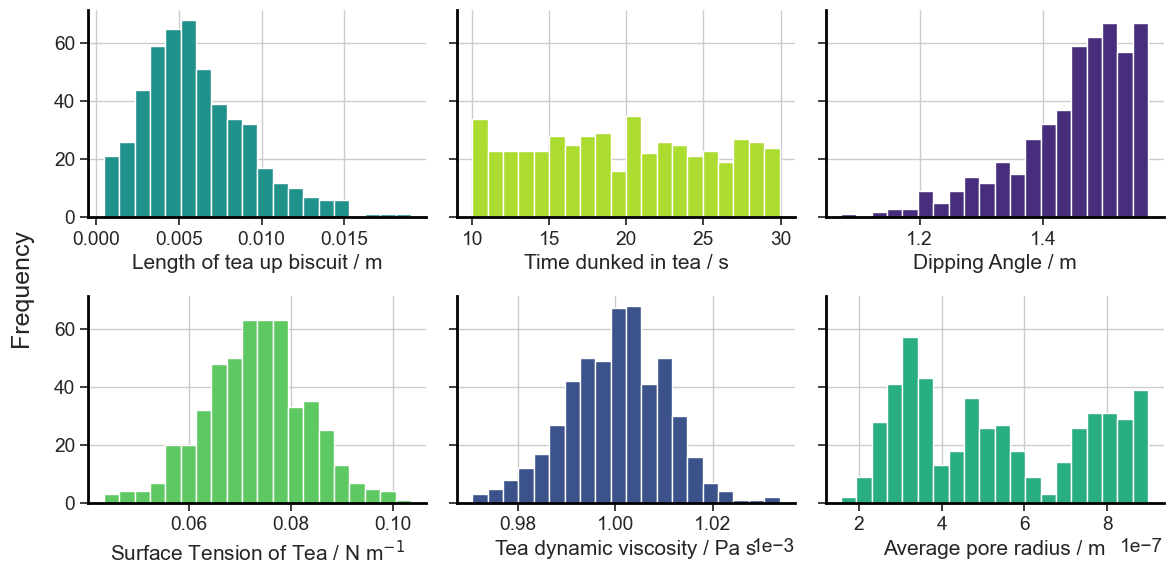

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(12, 6), sharey=True)

axs[0,0].hist(micro_df['L'], bins=20, color=palette[0])
axs[0,0].set_xlabel('Length of tea up biscuit / m')

axs[0,1].hist(micro_df['t'], bins=20, color=palette[1])
axs[0,1].set_xlabel('Time dunked in tea / s')

axs[0,2].hist(micro_df['phi'], bins=20, color=palette[2])
axs[0,2].set_xlabel('Dipping Angle / m')

axs[1,0].hist(micro_df['gamma'], bins=20, color=palette[3])
axs[1,0].set_xlabel(f'Surface Tension of Tea / N m$^{{-1}}$')

axs[1,1].hist(micro_df['eta'], bins=20, color=palette[4])
axs[1,1].set_xlabel('Tea dynamic viscosity / Pa s')
axs[1,1].ticklabel_format(style='sci', scilimits=(0,0), axis='x')

axs[1,2].hist(micro_df['r'], bins=20, color=palette[5])
axs[1,2].set_xlabel('Average pore radius / m')

fig.supylabel('Frequency')
plt.tight_layout()
plt.savefig('plot_images/micro_hist.png', dpi = 900)
plt.show()

In [6]:
micro_df = washburn_eqn(micro_df)
micro_df.head()

,gamma,phi,eta,L,t,r,L_squared,cos(phi),1/cos(phi),1/gamma,1/t,washburn_eqn
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,1.037194e-05,0.013429,74.466315,11.820941,0.041269,7.396247e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,5.736307e-06,0.031949,31.300200,15.554221,0.045106,2.513107e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,9.220038e-06,0.024656,40.558426,11.597758,0.042996,3.757911e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,1.589337e-06,0.003918,255.213816,12.068685,0.078632,7.678998e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,3.318623e-07,0.000567,1762.819840,11.009282,0.065836,8.494983e-07


In [7]:
micro_df.describe()

,gamma,phi,eta,L,t,r,L_squared,cos(phi),1/cos(phi),1/gamma,1/t,washburn_eqn
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,0.073197,1.448925,0.001000,0.006070,19.757165,5.344857e-07,4.693781e-05,0.120856,34.319103,13.930919,0.055740,5.346574e-07
std,0.009956,0.095581,0.000010,0.003180,5.803528,2.163520e-07,4.917554e-05,0.093695,129.632725,2.028064,0.018236,2.166864e-07
min,0.043428,1.072712,0.000971,0.000483,10.013910,1.562959e-07,2.330928e-07,0.000527,2.093174,9.667518,0.033406,1.544840e-07
25%,0.066741,1.404303,0.000993,0.003843,14.844579,3.278206e-07,1.476719e-05,0.050501,6.034094,12.615686,0.040375,3.275796e-07
50%,0.073391,1.471977,0.001001,0.005550,19.846801,4.938002e-07,3.079776e-05,0.098659,10.136098,13.625702,0.050386,4.935224e-07
75%,0.079266,1.520274,0.001007,0.007904,24.767974,7.572568e-07,6.247790e-05,0.165725,19.801741,14.983336,0.067365,7.543739e-07
max,0.103439,1.570269,0.001034,0.019009,29.934807,8.991764e-07,3.613416e-04,0.477743,1896.137923,23.026405,0.099861,9.202017e-07


In [8]:
micro_df = washburn_eqn(micro_df)
scatter_plot_3D(micro_df['L_squared'], micro_df['t'], micro_df['cos(phi)'],micro_df['cos(phi)'], 'L<sup>2</sup> / m<sup>2</sup>', 'Time / s', 'cos(Φ)', -1.75, -1.75, 1.5)

## Models

In [9]:
washburn_model = biscuit_models(micro_df)

## Washburn Equation

### Without any model, just taking a random sub set of the dataset through the train test split

In [10]:
mse = mean_squared_error(micro_df['washburn_eqn'], micro_df['r'])
mae = mean_absolute_error(micro_df['washburn_eqn'], micro_df['r'])
r2 = r2_score(micro_df['washburn_eqn'],micro_df['r'])

print(f'Mean Squared Error: {mse:.3e}, Mean Absolute Error: {mae:.3e}, R^2: {r2:.3f}')

Mean Squared Error: 1.198e-16, Mean Absolute Error: 8.236e-09, R^2: 0.997


### Using a linear regression model

Mean Squared Error: 1.543e-16
Mean Absolute Error: 9.361e-09
Root Mean Squared Error: 1.242e-08
$R^2$: 0.997


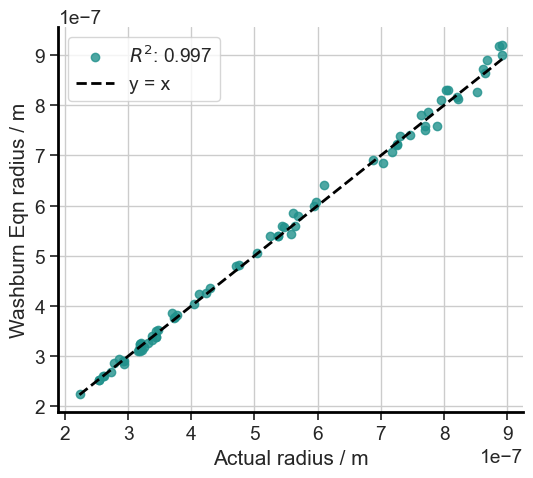

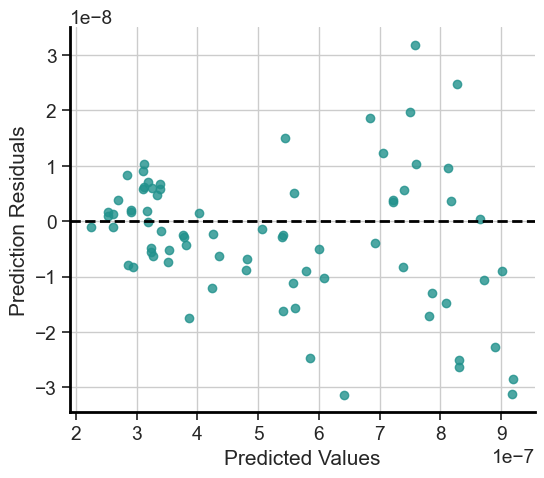

In [11]:
washburn_model.define_features(feature_columns=['washburn_eqn'], target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = False)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Washburn Eqn radius / m', xlabel='Actual radius / m', save_image=True, filename='plot_images/linwashpred.png')
washburn_model.plot_residuals()

In [12]:
print(f"washburn_eqn = {washburn_model.model.coef_[0]:.5e} * r + {washburn_model.model.intercept_:.3e}")

washburn_eqn = 1.00024e+00 * r + 0.000e+00


There is no clear difference between just calculating the values using the washburn equation or just placing it into a linear regression. I would have expected this but I wanted to double check how well the washburn equation could do. Additionally if a model could make a difference that would have been interesting! It does not.

## Other values within linear regression

In [13]:
base_features = ['gamma', 'phi', 'eta', 'L', 't']
features_within_eqn = ['L_squared', '1/t', '1/cos(phi)', '1/gamma', 'eta']
all_features = ['gamma', 'phi', 'eta', 'L', 't','L_squared', 'cos(phi)','1/gamma', '1/t', '1/cos(phi)']

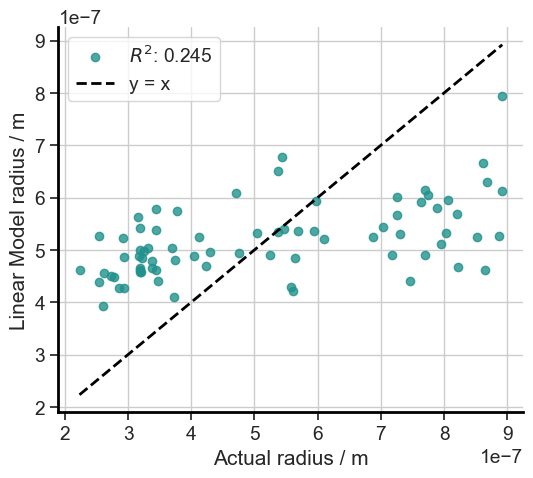

Mean Squared Error: 3.401e-14
Mean Absolute Error: 1.634e-07
Root Mean Squared Error: 1.844e-07
$R^2$: 0.245


In [14]:
washburn_model.define_features(feature_columns=features_within_eqn, target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = True)
washburn_model.evaluate_model()
washburn_model.plot_predictions(ylabel='Linear Model radius / m', xlabel='Actual radius / m')
washburn_model.print_metrics()

1 Features: ['L']
2 Features: ['L', 'L_squared']
3 Features: ['eta', 'L', 'L_squared']
4 Features: ['gamma', 'eta', 'L', 'L_squared']
5 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared']
6 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared', 'cos(phi)']
7 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared', 'cos(phi)', '1/gamma']
8 Features: ['gamma', 'phi', 'eta', 'L', 'L_squared', 'cos(phi)', '1/gamma', '1/cos(phi)']
9 Features: ['gamma', 'phi', 'eta', 'L', 't', 'L_squared', 'cos(phi)', '1/gamma', '1/cos(phi)']
10 Features: ['gamma', 'phi', 'eta', 'L', 't', 'L_squared', 'cos(phi)', '1/gamma', '1/t', '1/cos(phi)']


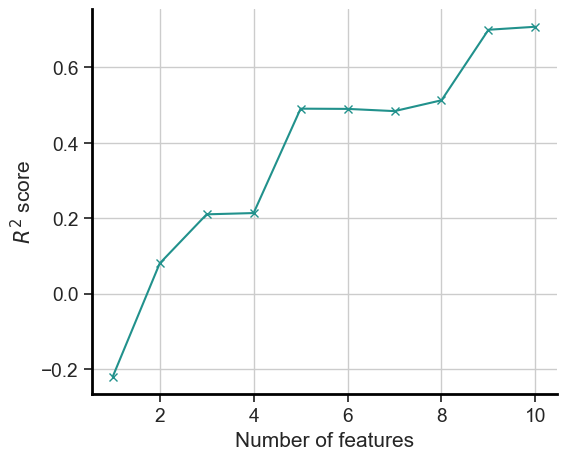

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression

regression_scores = []
features_df = washburn_model.df[all_features]

for i in range(1, len(features_df.columns)+1):
    selector = SelectKBest(f_regression, k=i)
    selector.fit(features_df, washburn_model.df['r'])
    # Get columns to keep and create new dataframe with those only
    cols_idxs = selector.get_support(indices=True)
    selectKbest_features = features_df.iloc[:,cols_idxs].columns.to_list()

    washburn_model.define_features(feature_columns=selectKbest_features, target_column='r')
    washburn_model.train_test_split_data(test_size=0.15, random_state=42)
    washburn_model.train_model(model_type='linear_regression', fit_intercept = False)
    washburn_model.evaluate_model()
    regression_scores.append(washburn_model.r2)
    
    print(f'{i} Features: {selectKbest_features}')

plt.figure(figsize=(6, 5))
plt.plot(range(1, len(features_df.columns)+1), regression_scores, marker='x')
plt.xlabel('Number of features')
plt.ylabel(f'$R^{2}$ score')
plt.show()

The best model here has all features included, this might overfit the model?

Mean Squared Error: 9.804e-15
Mean Absolute Error: 7.555e-08
Root Mean Squared Error: 9.902e-08
$R^2$: 0.782


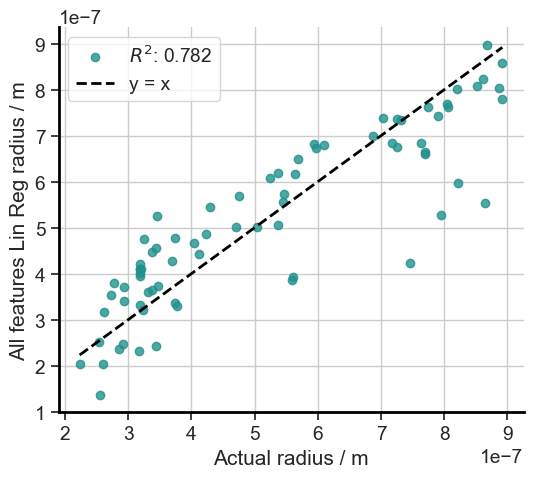

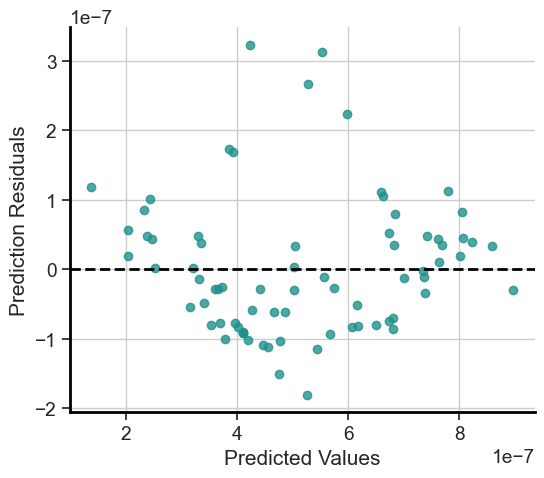

In [16]:
washburn_model.define_features(feature_columns=all_features, target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = True)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='All features Lin Reg radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()

Okay so I would say that this is not overfitted but also this is a polynomial residual! we need to include this into the model.

Lets test this with only values already within the equation, we don't include L^2 here as the polynomial transformation should help with that

Mean Squared Error: 6.454e-15
Mean Absolute Error: 6.223e-08
Root Mean Squared Error: 8.034e-08
$R^2$: 0.857


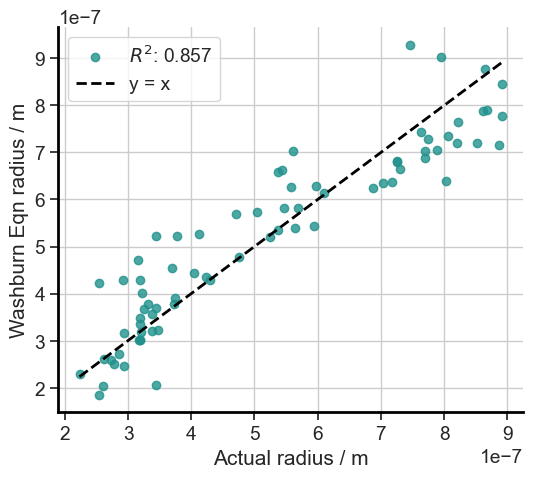

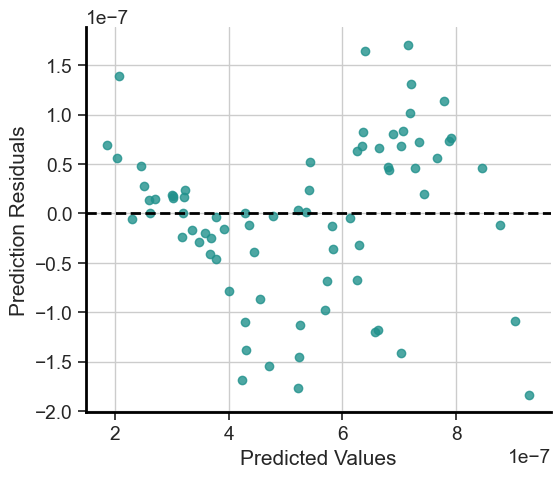

In [17]:
washburn_model.define_features(feature_columns=['L', '1/t', '1/cos(phi)', 'eta', '1/gamma'], target_column='r')
washburn_model.polynommial_features(degree=2)
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = True)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Washburn Eqn radius / m', xlabel='Actual radius / m', save_image=True, filename='plot_images/polymultilinpred.png')
washburn_model.plot_residuals()

Mean Squared Error: 2.842e-15
Mean Absolute Error: 3.386e-08
Root Mean Squared Error: 5.331e-08
$R^2$: 0.937


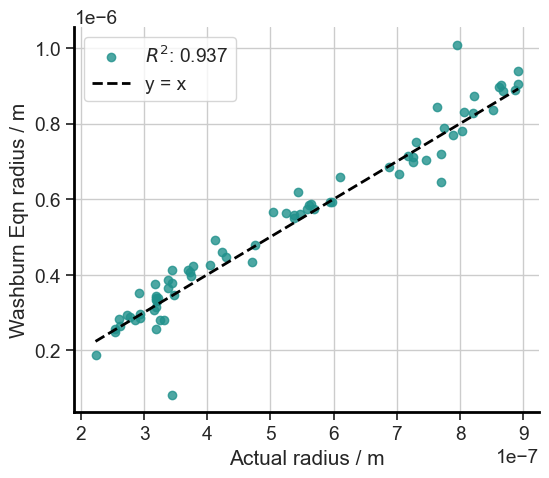

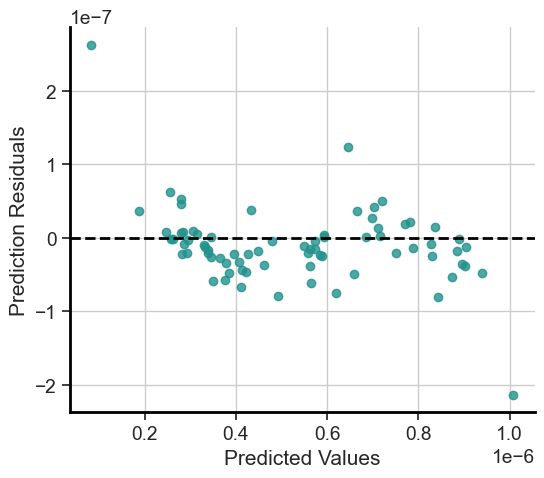

In [18]:
washburn_model.define_features(feature_columns=['L', '1/t', '1/cos(phi)', 'eta', '1/gamma'], target_column='r')
washburn_model.polynommial_features(degree=3)
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='linear_regression', fit_intercept = True)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Washburn Eqn radius / m', xlabel='Actual radius / m', save_image=True, filename='plot_images/polymultilinpred.png')
washburn_model.plot_residuals()

Polynomial fitting above 2 produces better results but the model is overfitting as a few of the values are very very clear outliers. The residual plot does not look the same as the washburn eqn one.

## Random Forest Regression

Mean Squared Error: 1.115e-14
Mean Absolute Error: 8.139e-08
Root Mean Squared Error: 1.056e-07
$R^2$: 0.753


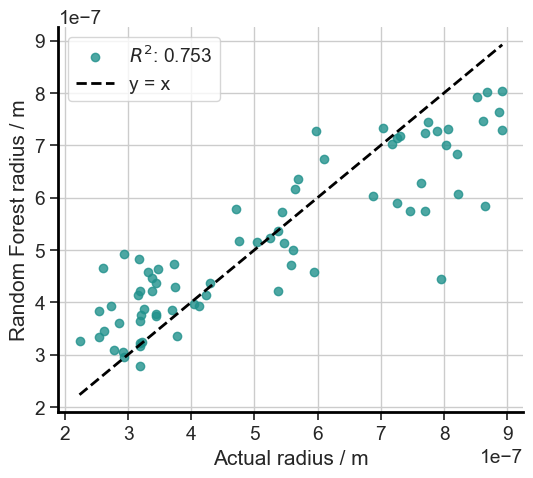

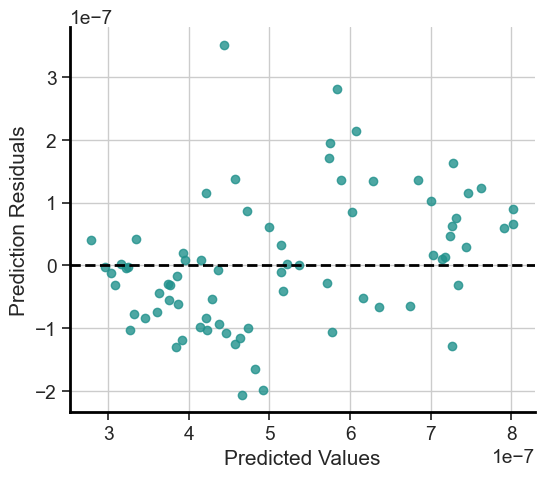

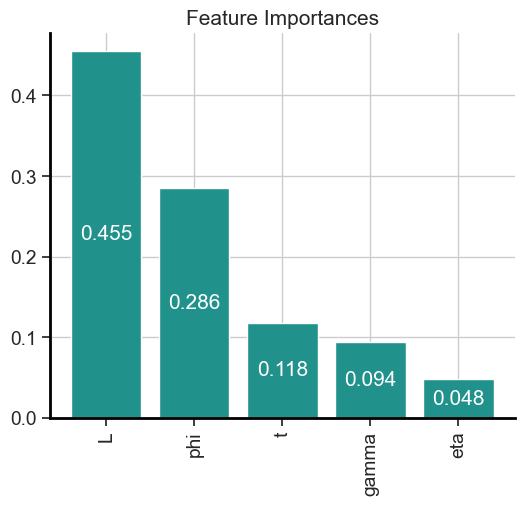

In [19]:
washburn_model.define_features(feature_columns=base_features, target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='random_forest_regression', random_state=42, n_estimators=100, max_features=None)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Random Forest radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()
washburn_model.plot_feature_importances()

The model only really sees L_squared, cos(phi) and t to be important values, lets make a model with only these and maybe a model without any transformations to the data eg. no 1/t ect.

Mean Squared Error: 8.434e-15
Mean Absolute Error: 7.008e-08
Root Mean Squared Error: 9.184e-08
$R^2$: 0.813


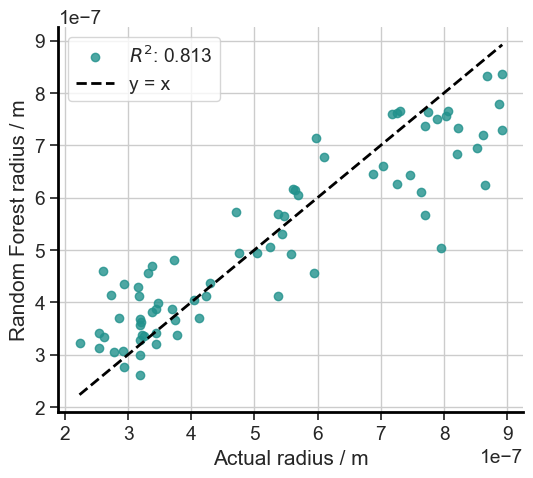

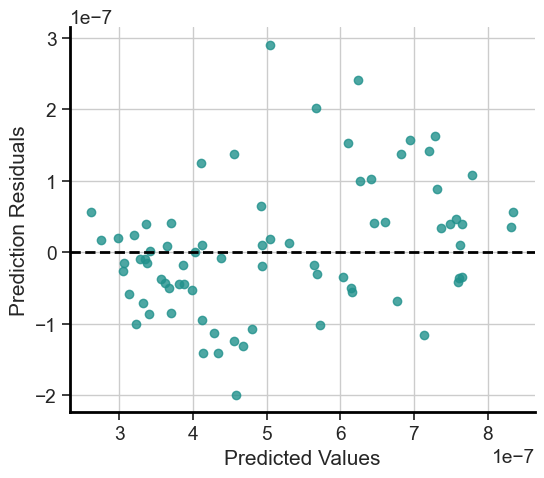

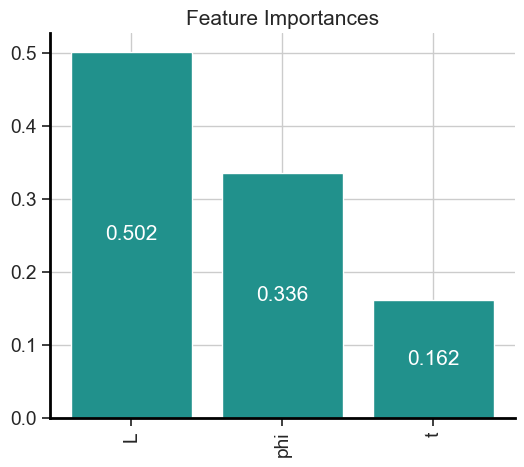

In [20]:
washburn_model.define_features(feature_columns=['L', 'phi', 't'], target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='random_forest_regression', random_state=42, n_estimators=100, max_features=None)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Random Forest radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()
washburn_model.plot_feature_importances()

The model benefits largely from fewer variables, this is probably due to the random forest struggling to find structure from gamme and eta since they don't really influence the value of r as much

Mean Squared Error: 8.770e-15
Mean Absolute Error: 7.081e-08
Root Mean Squared Error: 9.365e-08
$R^2$: 0.805


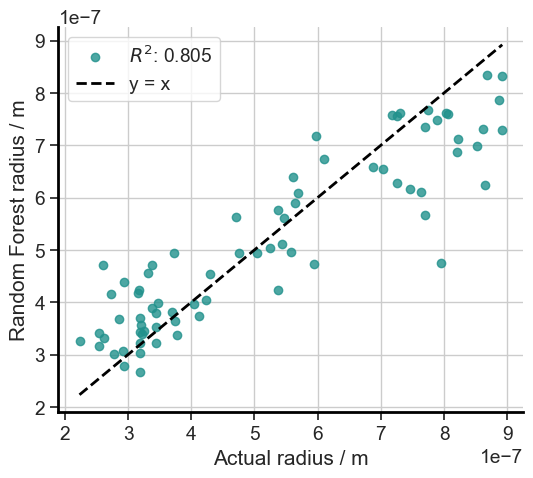

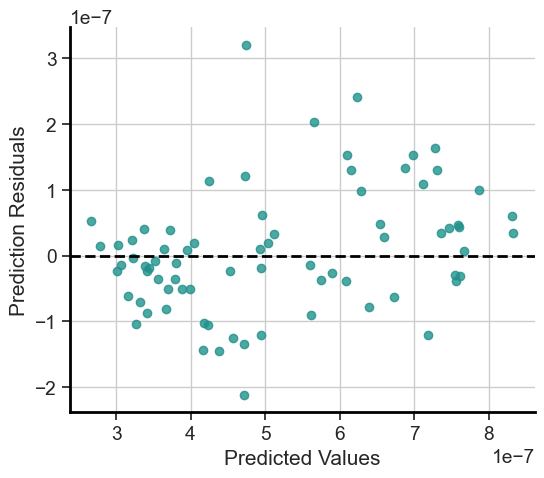

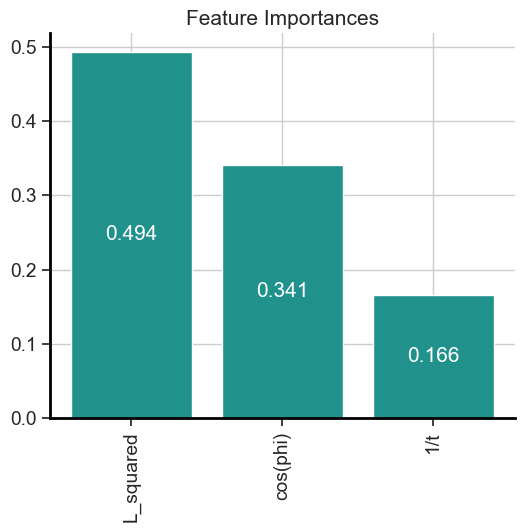

In [21]:
washburn_model.define_features(feature_columns=['L_squared', 'cos(phi)', '1/t'], target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='random_forest_regression', random_state=42, n_estimators=100, max_features=None)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Random Forest radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()
washburn_model.plot_feature_importances()

I wanted to put in the values as is from equation but it seems worse, I think allowing the random forest regressor to do it's work in finding structure helps the model more

Mean Squared Error: 3.110e-15
Mean Absolute Error: 4.418e-08
Root Mean Squared Error: 5.577e-08
$R^2$: 0.931


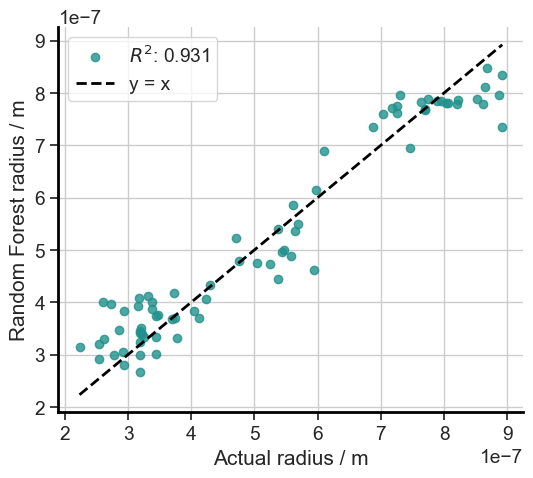

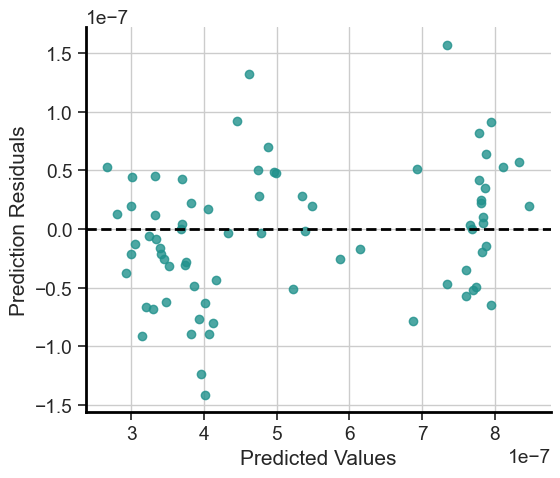

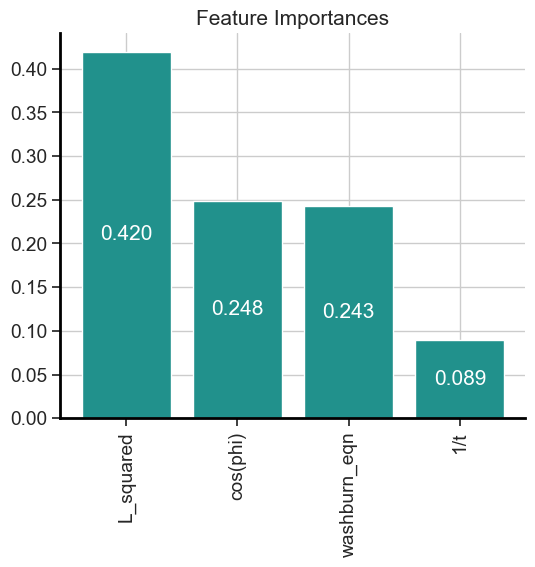

In [22]:
washburn_model.define_features(feature_columns=['washburn_eqn', 'L_squared', '1/t', 'cos(phi)'], target_column='r')
washburn_model.train_test_split_data(test_size=0.15, random_state=42)
washburn_model.train_model(model_type='random_forest_regression', random_state=42, n_estimators=100, max_features=None)
washburn_model.evaluate_model()
washburn_model.print_metrics()
washburn_model.plot_predictions(ylabel='Random Forest radius / m', xlabel='Actual radius / m')
washburn_model.plot_residuals()
washburn_model.plot_feature_importances()

WELL! The random forest model does worse off here than the linear regression model/ just using the equation even when implementing the equation value into the model. It's clear that using anything but the washburn equation alone would not present a more accurate model.

# Concluding Statement

The washburn equation does the best out of all the model I have made. Just goes to show how well it can descibe a biscuits complex structure.